In [1]:
import threerra # Load threerra.py
import numpy as np
from qiskit.tools.visualization import plot_histogram

In [2]:
# Load IMB Quantum credentials

from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Choose device
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')

# Test draw

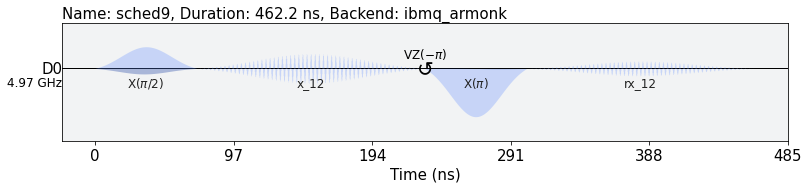

In [4]:
# Test QuantumCircuit3
qc = threerra.QuantumCircuit3(backend)
qc.rx_01(np.pi/2)
qc.x_12()
qc.rz(np.pi)
qc.x_01()
qc.rx_12(np.pi/2)
qc.draw() # You can pass arguments to draw()

# Test calibrations

In [5]:
qc.calibrate_freq_01()

Calibrating qubit_freq_est_01...
Job Status: job has successfully run
qubit_freq_est_01 updated from 4.971588886948857GHz to 4.971532425319584GHz.


In [6]:
qc.calibrate_pi_amp_01()

Calibrating pi_amp_01...
Job Status: job has successfully run
pi_amp_01 updated from 0.1556930479027419 to 0.18031428887095377.


In [9]:
qc.calibrate_freq_12()

Calibrating qubit_freq_est_12...
Job Status: job has successfully run
qubit_freq_est_12 updated from 4.624395955466031GHz to 4.623977267110111GHz.


In [10]:
qc.calibrate_pi_amp_12()

Calibrating pi_amp_12...
Job Status: job has successfully run
pi_amp_12 updated from 0.2797548240848574 to 0.1915335757378427.


# Test Measurement 

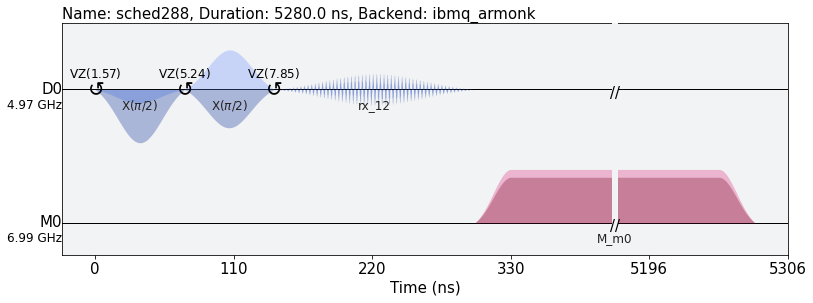

In [11]:
qc = threerra.QuantumCircuit3(backend)
qc.rx_01(2*np.pi/3)
qc.rx_12(np.pi/2)
qc.measure()
qc.draw()

In [12]:
job_results = qc.run(disc012=True)

Job Status: job has successfully run
0.7975260416666666


In [ ]:
import matplotlib.pyplot as plt
plt.hist(job_results, density=True)
plt.show()

In [ ]:
from qiskit_experiments.library import EFRabi